In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
df = pd.read_csv('RadiationPattern.csv')
# Rename your columns directly using the .csv file

In [3]:
# Data preprocessing
df = df[df['Power']!=0.0]
df.loc[df['Angle'] > 70, 'Angle'] -= 360
df = df.sort_values(by='Angle')
Power0 = 1
df['Power(Linear)'] = Power0*10**(df['Power']/10)

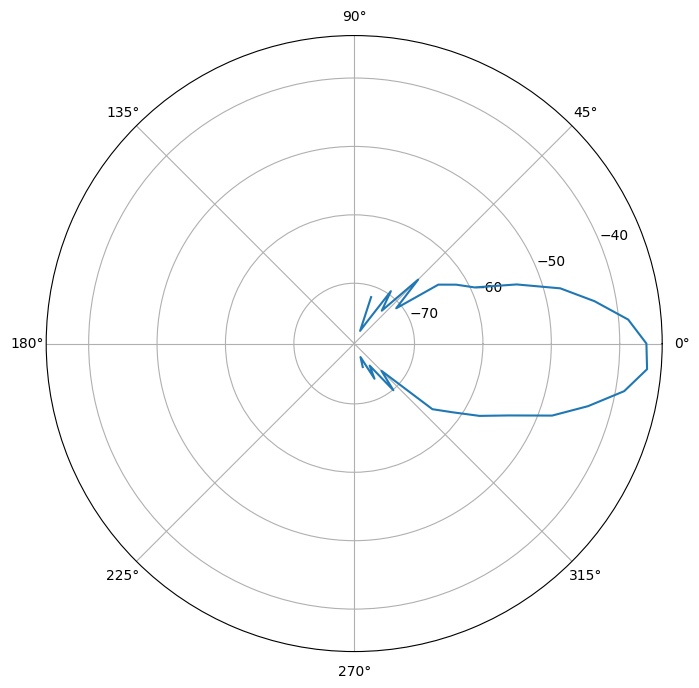

In [4]:
angle = df['Angle']*np.pi/180
power = df['Power']
plt.figure(figsize=(10,8))
plt.polar(angle, power)
plt.savefig('HornAntenna.png');

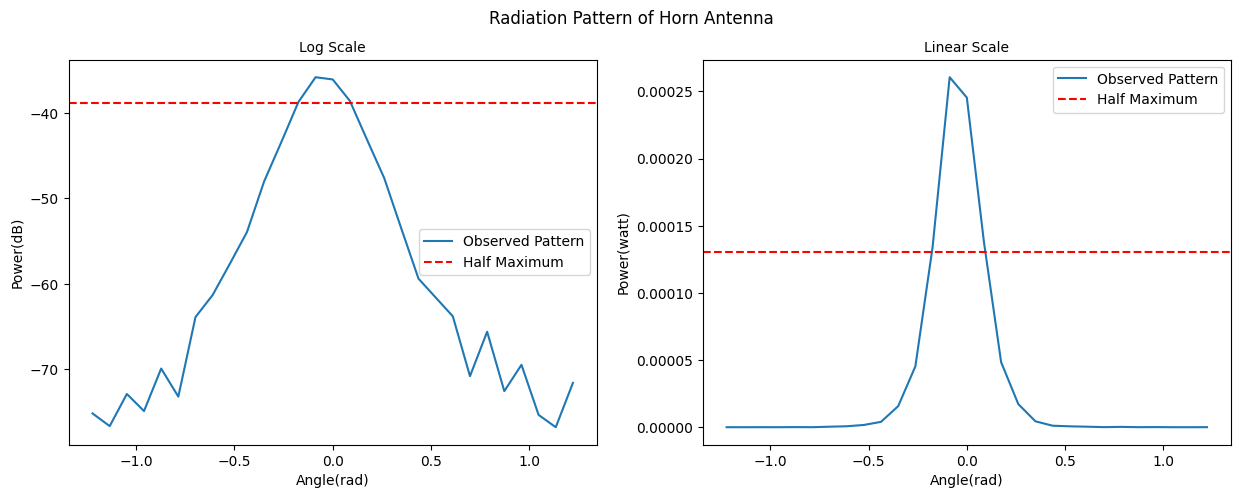

Half of the Maximum Power:-38.84


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Radiation Pattern of Horn Antenna')

axes[0].plot(angle, power, label='Observed Pattern')
axes[0].axhline(max(power)-3, c='r', linestyle='--', label='Half Maximum')
axes[0].set_title('Log Scale', size=10)
axes[0].set_xlabel('Angle(rad)')
axes[0].set_ylabel('Power(dB)')
axes[0].legend()

axes[1].plot(angle,df['Power(Linear)'], label='Observed Pattern')
axes[1].axhline(max(df['Power(Linear)'])/2,c='r', linestyle='--', label='Half Maximum')
axes[1].set_title('Linear Scale', size=10)
axes[1].set_xlabel('Angle(rad)')
axes[1].set_ylabel('Power(watt)')
axes[1].legend()

plt.savefig('LogLinear.png')
plt.show()

print(f"Half of the Maximum Power:{max(power)-3}")

Angular Width aka Half Power Beamwidth:0.23466566367128947


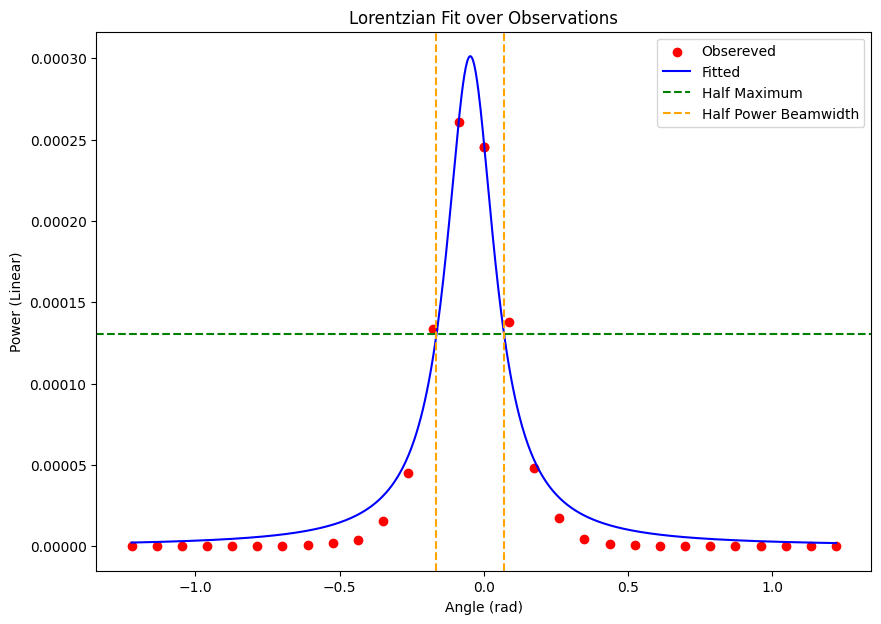

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(angle,df['Power(Linear)'], color='red', label='Obsereved')
def lorentzian(x, x0, gamma, A):
    return A * (1/np.pi) * (gamma / ((x - x0)**2 + gamma**2))
params, covt = curve_fit(lorentzian, angle, df['Power(Linear)'])
pred_angle = np.linspace(min(angle),max(angle), 1000)
pred_power = lorentzian(pred_angle, params[0], params[1], params[2])
plt.plot(pred_angle, pred_power, color='blue',label='Fitted')
plt.axhline(max(df['Power(Linear)'])/2, color='green', linestyle='--', label='Half Maximum')
eps = 0.015
plt.axvline(params[0]-params[1]-eps, color='orange', linestyle='--', label='Half Power Beamwidth')
plt.axvline( params[0]+params[1]+eps, color='orange', linestyle='--')
plt.xlabel('Angle (rad)')
plt.ylabel('Power (Linear)')
plt.title('Lorentzian Fit over Observations')
plt.legend()
plt.savefig('lorentzianfit.png')

print(f"Angular Width aka Half Power Beamwidth:{2*(params[1]+eps)}")

In [7]:
params[0]

-0.0468258809656673

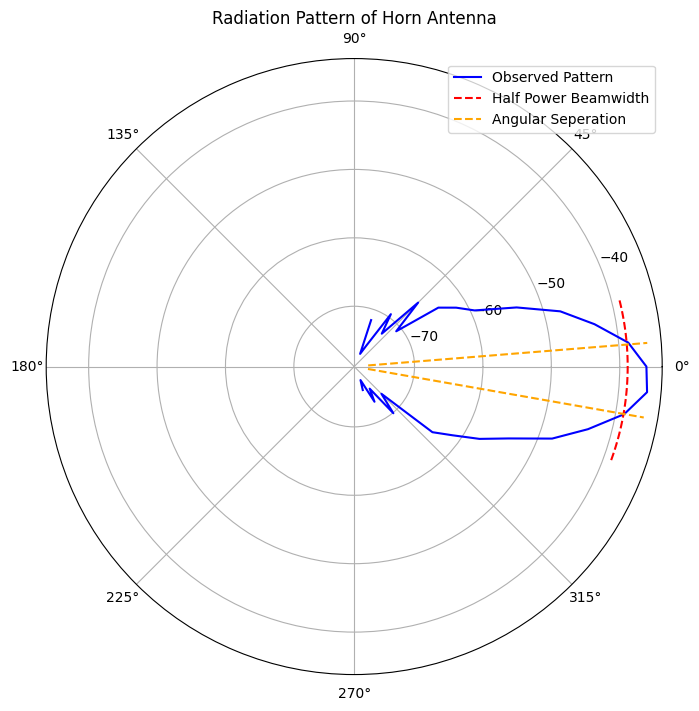

In [8]:
eps=0.2
angular_seperation = np.linspace(params[0]-params[1]-eps, params[0]+params[1]+eps, 100)
half_power = np.ones_like(angular_seperation)*((max(power)-3))

eps = 0.025
power_array = np.linspace(min(power),max(power),100)
up_angle_array = np.ones_like(power_array)*(params[0]-params[1]-eps)
down_angle_array = np.ones_like(power_array)*(params[0]+params[1]+eps)

plt.figure(figsize=(10,8))
plt.polar(angle, power, color='blue', label='Observed Pattern')
plt.polar(angular_seperation,half_power, color='red', linestyle='--',label='Half Power Beamwidth')
plt.polar(up_angle_array,power_array, color='orange',linestyle = '--', label='Angular Seperation')
plt.plot(down_angle_array,power_array, color='orange', linestyle = '--')
plt.title("Radiation Pattern of Horn Antenna")
plt.legend()
plt.savefig('HornAntennaWidth.png');

data = signal * signal<br>
data = FT(sigal)FT(sigal)<br>
data = FT(signal)^2<br>
sqrt(data) = FT(signal)<br>
signal = IFT(sqrt(data))<br>

since data has -ve sign<br>
for taking the sqrt -1 * data * -1<br>
sqrt(-data) possible and sqrt(-1) = i which multiplied later<br>

In [9]:
xd = np.fft.ifftn(np.sqrt(-power)*1j)

c:\Users\win 10\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\win 10\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


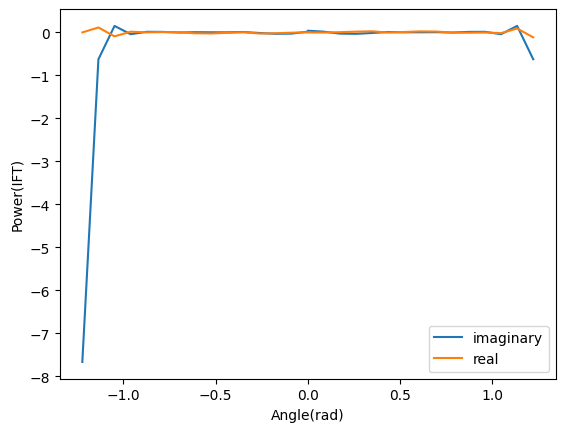

In [10]:
plt.plot(angle,xd*1j, label='imaginary')
plt.plot(angle,xd, label='real')
plt.xlabel('Angle(rad)')
plt.ylabel('Power(IFT)')
plt.legend()
plt.savefig('realimg.png')

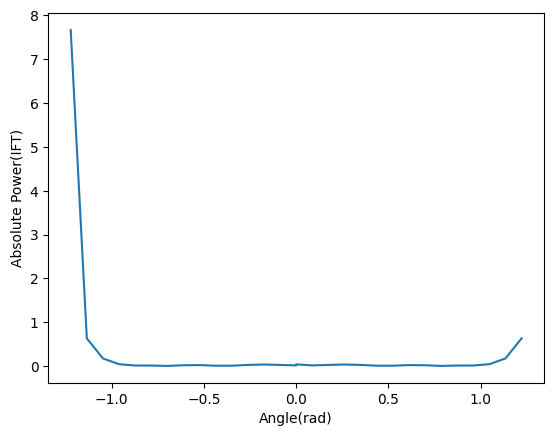

In [11]:
plt.plot(angle, np.abs(xd))
plt.xlabel('Angle(rad)')
plt.ylabel('Absolute Power(IFT)')
plt.savefig('abs.png')